### 第一个分类网络之手写数字识别

- 代码参考1 ：https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/logistic_regression/main.py#L33-L34
- 代码参考2 ：https://zhuanlan.zhihu.com/p/174217734?utm_source=qq&utm_medium=social&utm_oi=41008184164352
- 代码参考3 ：https://github.com/JaimeTang/PyTorch-and-mnist/blob/master/pytorch-and-mnist.ipynb
- 卷积理解1：https://www.cnblogs.com/delphi-xe5/p/11373199.html
- 卷积理解2：https://www.zhihu.com/question/22298352
- 卷积神经网络理解1：https://zhuanlan.zhihu.com/p/82138024
- 卷积神经网络理解2：https://www.zhihu.com/topic/20043586/intro
- 卷积神经网络理解3：https://www.toutiao.com/i6631121749331149315/?group_id=6631121749331149315&wid=1622019475690
- 卷积神经网络理解4：https://blog.csdn.net/weixin_43843657/article/details/89138646




In [27]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [5]:
#设置超参
# input_size=28*28
num_classes=10
num_epochs=5
batch_size=100
lr=0.001

In [16]:
#加载数据集 训练集和验证集
#训练集
train_dataset=torchvision.datasets.MNIST(root="./data",train=True,transform=transforms.ToTensor(),download=True)
#验证集
test_dataset=torchvision.datasets.MNIST(root="./data",train=False,transform=transforms.ToTensor(),download=True)

train_loader=DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

test_loader=DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)


In [21]:
#定义神经网络模型
# 两个卷积网络 每一个都是包含卷积网络+激活函数+池化
#input--卷积--Relu--pooling--卷积--Relu--pooling--linear--output
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        #第一个卷积神经网络 input shape（1,28,28）
        self.conv1=nn.Sequential(
        nn.Conv2d(
            in_channels=1, #input channels
            out_channels=16,#output channels 或者叫 n_filters
            kernel_size=5, #filter_size （5x5）
            stride=1,# filter movement/step 步长
            padding=2# 如果想要Conv2d出来的图片长宽没有变化，当stride=1时，padding=（kernal_size-1）/2 [H_out=floor([(H_in+2*padding-kernal_size)/stride]+1)]
        ),#output shape (16,28,28)
            nn.ReLU(),#activation
            nn.MaxPool2d(kernel_size=2),#池化层，特征降维，每两个取最大一个，2变1故（28x28）变成（14x14）
        )#output shape (16,14,14)
        #第2个卷积神经网络
        self.conv2=nn.Sequential(
          nn.Conv2d(#input shape (16,14,14)
            in_channels=16,
            out_channels=32,
            kernel_size=5,
            stride=1,
            padding=2
          ),#output shape (32,14,14)
             nn.ReLU(),#activation
            nn.MaxPool2d(kernel_size=2),#池化层，特征降维，每两个取最大一个，2变1故（14x14）变成（7x7）
        )
        self.out=nn.Linear(32*7*7,10)
    
    def forward(self,x):
        x=self.conv1(x)
        x=self.conv2(x)
        x=x.view(x.size(0),-1)#将（N,32,7,7）展平为（batch_size,32*7*7）
        return self.out(x)

In [22]:
#实例化神经网络
cnn_net=Net()
#构建优化模型
optim=torch.optim.Adam(cnn_net.parameters(),lr=lr)

#交叉熵损失函数
loss_fn=nn.CrossEntropyLoss()

# Train the model
total_step = len(train_loader)
#共训练num_epochs，每次都跑完6000个样本
for i_epoch in range(num_epochs):
    #将全部样本分割为每次抽100，共循环6000/100次
    for i,(images,labels) in enumerate(train_loader):
        predict_output=cnn_net(images)
        loss=loss_fn(predict_output,labels)
        optim.zero_grad()
        loss.backward()
        optim.step()
        
        #每过100次记录一次损失
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(i_epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.1907
Epoch [1/5], Step [200/600], Loss: 0.1014
Epoch [1/5], Step [300/600], Loss: 0.0571
Epoch [1/5], Step [400/600], Loss: 0.1278
Epoch [1/5], Step [500/600], Loss: 0.0945
Epoch [1/5], Step [600/600], Loss: 0.0450
Epoch [2/5], Step [100/600], Loss: 0.0167
Epoch [2/5], Step [200/600], Loss: 0.0282
Epoch [2/5], Step [300/600], Loss: 0.1364
Epoch [2/5], Step [400/600], Loss: 0.0577
Epoch [2/5], Step [500/600], Loss: 0.0277
Epoch [2/5], Step [600/600], Loss: 0.0518
Epoch [3/5], Step [100/600], Loss: 0.0860
Epoch [3/5], Step [200/600], Loss: 0.0201
Epoch [3/5], Step [300/600], Loss: 0.1053
Epoch [3/5], Step [400/600], Loss: 0.0424
Epoch [3/5], Step [500/600], Loss: 0.0184
Epoch [3/5], Step [600/600], Loss: 0.1346
Epoch [4/5], Step [100/600], Loss: 0.0970
Epoch [4/5], Step [200/600], Loss: 0.0225
Epoch [4/5], Step [300/600], Loss: 0.0567
Epoch [4/5], Step [400/600], Loss: 0.0096
Epoch [4/5], Step [500/600], Loss: 0.0739
Epoch [4/5], Step [600/600], Loss:

In [24]:
#test module
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct=0
    total=0
    for images,labels in test_loader:
        test_output=cnn_net(images)
        #取每行最大值所对应索引【1】是最大值的索引值
        pred_labels=torch.max(test_output,1)[1].data
        total+=labels.size(0)#第一维的值
        correct+=(pred_labels==labels).sum()
        
    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))
    
# Save the model checkpoint
torch.save(cnn_net.state_dict(), 'model.ckpt')

Accuracy of the model on the 10000 test images: 98.94999694824219 %


Predict Label is: [6, 2, 0, 9]
Real Label is: [6, 2, 0, 9]


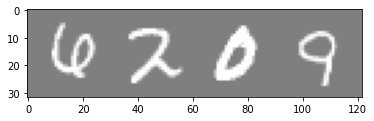

In [35]:
#加载训练好的模型 参考 https://www.jianshu.com/p/1cd6333128a1
cnn=Net()
cnn.load_state_dict(torch.load('model.ckpt'))

data_loader_test = DataLoader(dataset=test_dataset,
                                          batch_size = 4,
                                          shuffle = True)

X_test, y_test = next(iter(data_loader_test))

pred = cnn(X_test)
_,pred = torch.max(pred, 1)

print("Predict Label is:", [ i for i in pred.data.numpy()])
print("Real Label is:",[i for i in y_test.data.numpy()])


img = torchvision.utils.make_grid(X_test)
img = img.numpy().transpose(1,2,0)

std = [0.5,0.5,0.5]
mean = [0.5,0.5,0.5]
img = img*std+mean
plt.imshow(img)